## mdc2 one root file analysis using uproot

In [1]:
import uproot

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak  # this one looks awkward !! it's array manipulation package

In [3]:
file = uproot.open('out73.root.root_piemc.root')

In [7]:
file['_eventTree'] # this one object I knew before hand it has inside it

<TTree '_eventTree' (9 branches) at 0x7fc4a6e5d730>

In [8]:
tree = file['_eventTree']

In [10]:
# What are the branches/columns in this tree?
tree.keys()

['_eventNumber',
 '_nClusters',
 '_clusterIDs',
 '_clusterEnergies',
 '_clusterPts',
 '_clusterEtas',
 '_clusterPhis',
 '_maxTowerEtas',
 '_maxTowerPhis']

In [13]:
branches = tree.arrays()

In [15]:
branches['_clusterEnergies'] # here we see there are 282 events in this file or TTree

<Array [[0.635, 0.681, 0.762, ... 0.758, 1.01]] type='282 * var * float32'>

In [20]:
# but each event will have obviously various number of clusters
# for example let's see how many clusters are there in first 10 events
for i in range(10):
    print(branches['_clusterEnergies'][i])

[0.635, 0.681, 0.762, 1.47, 0.697, 0.671, 0.641, 0.606, 0.634]
[0.852, 0.607, 0.711, 0.701, 1.27, 0.61, ... 0.729, 0.694, 0.744, 0.842, 0.772]
[1.21, 0.772, 1.18, 0.798, 0.742, 0.809, ... 0.873, 0.916, 0.727, 0.604, 1.17, 1.01]
[0.666, 0.686, 0.602, 0.885, 0.663, 0.676, ... 0.631, 1.09, 0.69, 0.95, 0.69, 1.4]
[0.754, 0.612, 0.729, 0.91, 1.38, 1.34, ... 0.688, 0.662, 0.802, 0.605, 0.894, 0.869]
[1.06]
[0.634, 0.627, 1.29, 0.708, 0.813, 0.755, ... 0.935, 0.656, 1, 0.815, 1.04, 1.77]
[]
[0.624, 1.06, 0.67, 0.632, 0.688, 0.845, 0.662, 0.682]
[0.626, 0.812]


In [22]:
# so we can see various number of clusters are formed for each event
# this branch is jagged
# we can see sometimes no clusters, whoopsy!

In [23]:
# what if we want to see entire one event?
branches[0] # first event

<Record ... 79, 234, 225, 127, 228, 191, 188]} type='{"_eventNumber": int32, "_n...'>

In [25]:
branches[0].tolist() # careful with this, since we only had 9 clusters so we could do here else !!!

{'_eventNumber': 0,
 '_nClusters': 9,
 '_clusterIDs': [1102577664,
  1105199104,
  1109131264,
  1122500608,
  1123680256,
  1133215744,
  1135181824,
  1138982912,
  1140719616],
 '_clusterEnergies': [0.6353528499603271,
  0.6809836626052856,
  0.7618188261985779,
  1.4655790328979492,
  0.6972529292106628,
  0.6707558035850525,
  0.6408973932266235,
  0.6063162684440613,
  0.6336616277694702],
 '_clusterPts': [0.3923359811306,
  0.4213838577270508,
  0.49040430784225464,
  1.1223856210708618,
  0.5567611455917358,
  0.6700992584228516,
  0.6219411492347717,
  0.48624908924102783,
  0.4415590763092041],
 '_clusterEtas': [-1.0623561143875122,
  -1.0597255229949951,
  -1.0087733268737793,
  -0.7633434534072876,
  -0.6962559223175049,
  0.04426232725381851,
  0.24627473950386047,
  0.6890334486961365,
  0.9019153714179993],
 '_clusterPhis': [1.793544888496399,
  -0.04656645283102989,
  -2.84602427482605,
  0.9402312636375427,
  0.7276772260665894,
  -1.671758770942688,
  0.80696582794189

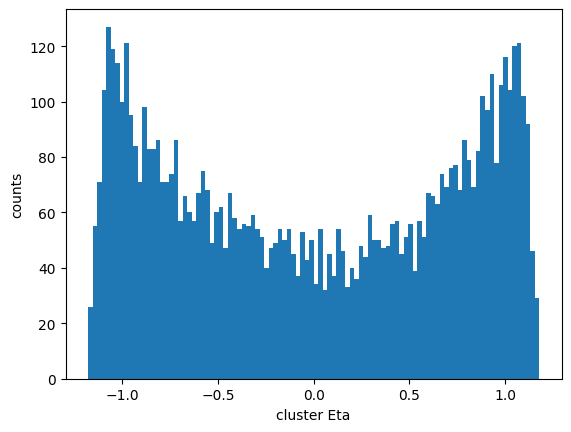

In [36]:
# let's see what we can do with histogramming
plt.hist(ak.flatten(branches['_clusterEtas']), bins=100)
plt.xlabel('cluster Eta')
plt.ylabel('counts')
plt.show()

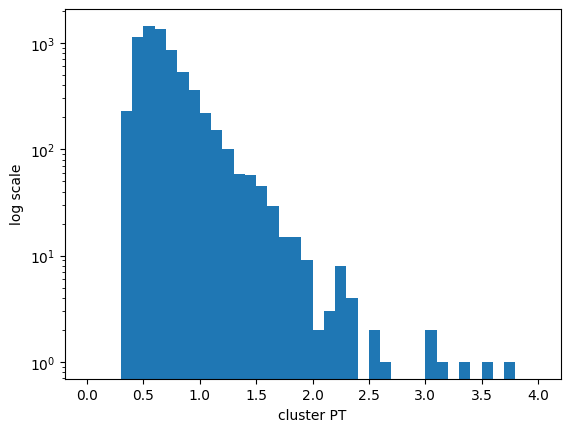

In [40]:
## let's see cluster pts distributions
plt.hist(ak.flatten(branches['_clusterPts']), bins=40, range=(0,4))
plt.yscale('log')
plt.xlabel('cluster PT')
plt.ylabel('log scale')
plt.show()

In [51]:
# let's create some mask and plot distributions with that mask
cluster_pt_zero_pt_six = branches['_clusterPts']>0.6
cluster_pt_zero_pt_nine = branches['_clusterPts']>0.9
energy_cut_1_5 = branches['_clusterEnergies']>1.5

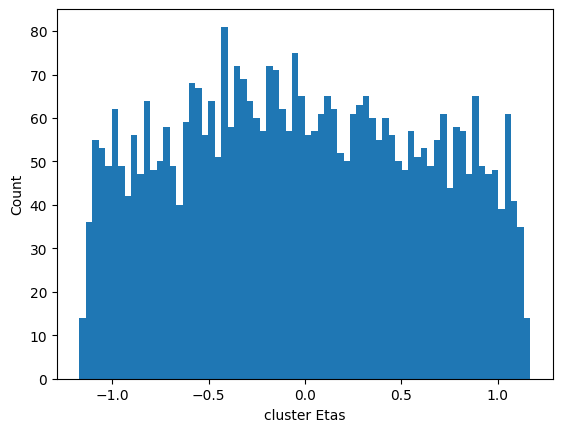

In [49]:
# now let's plot with this mask

plt.hist(ak.flatten(branches['_clusterEtas'][cluster_pt_zero_pt_six]), bins=70)
plt.xlabel('cluster Etas')
plt.ylabel('Count')
plt.show()

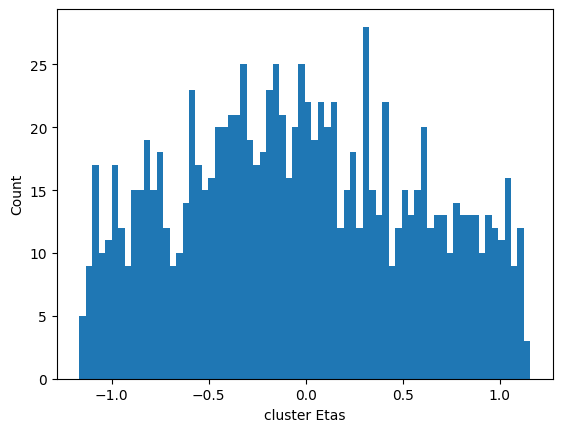

In [50]:
plt.hist(ak.flatten(branches['_clusterEtas'][cluster_pt_zero_pt_nine]), bins=70)
plt.xlabel('cluster Etas')
plt.ylabel('Count')
plt.show()

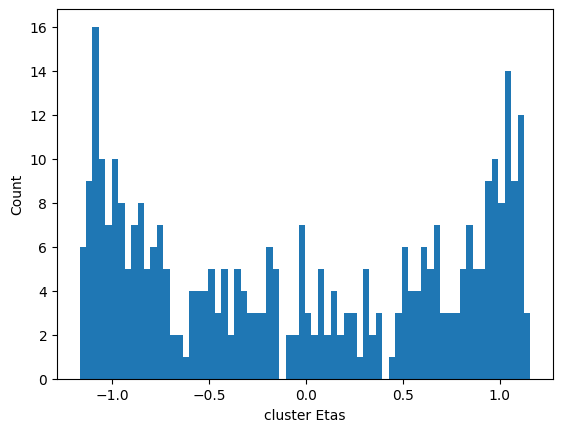

In [52]:
plt.hist(ak.flatten(branches['_clusterEtas'][energy_cut_1_5]), bins=70)
plt.xlabel('cluster Etas')
plt.ylabel('Count')
plt.show()

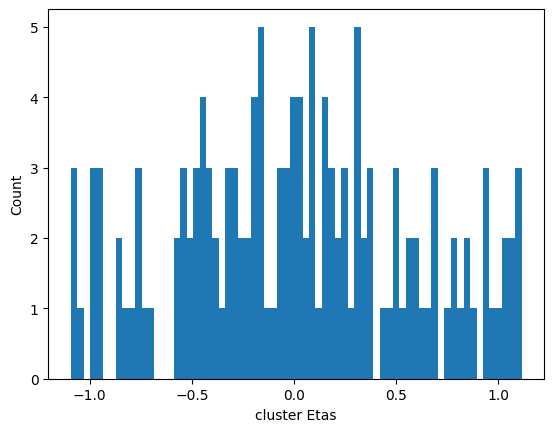

In [53]:
plt.hist(ak.flatten(branches['_clusterEtas'][branches['_clusterPts']>1.5]), bins=70)
plt.xlabel('cluster Etas')
plt.ylabel('Count')
plt.show()